<a href="https://colab.research.google.com/github/rajeski/GC/blob/main/Basic_Covid19_Data_Vis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns 

import plotly.express as px ### to plot data to a World Map 

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-25-2020.csv'
df = pd.read_csv(path)

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3435 entries, 0 to 3434
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3008 non-null   float64
 1   Admin2          3011 non-null   object 
 2   Province_State  3255 non-null   object 
 3   Country_Region  3435 non-null   object 
 4   Last_Update     3435 non-null   object 
 5   Lat             3364 non-null   float64
 6   Long_           3364 non-null   float64
 7   Confirmed       3435 non-null   int64  
 8   Deaths          3435 non-null   int64  
 9   Recovered       3435 non-null   int64  
 10  Active          3435 non-null   int64  
 11  Combined_Key    3435 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 322.2+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-26 02:32:35,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-26 02:32:35,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-26 02:32:35,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-26 02:32:35,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-26 02:32:35,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"


In [3]:
df.tail()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
3430,NaN,NaN,Terengganu,Malaysia,2020-05-26 02:32:35,5.3117,103.1324,113,1,110,0,"Terengganu, Malaysia"
3431,NaN,NaN,W.P. Kuala Lumpur,Malaysia,2020-05-26 02:32:35,3.1390,101.6869,1803,17,1292,0,"W.P. Kuala Lumpur, Malaysia"
3432,NaN,NaN,W.P. Labuan,Malaysia,2020-05-26 02:32:35,5.2831,115.2308,16,0,16,0,"W.P. Labuan, Malaysia"
3433,NaN,NaN,W.P. Putrajaya,Malaysia,2020-05-26 02:32:35,2.9264,101.6964,93,1,83,0,"W.P. Putrajaya, Malaysia"
3434,NaN,NaN,Unknown,Malaysia,2020-05-26 02:32:35,NaN,NaN,0,0,0,0,"Unknown, Malaysia"


In [4]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,299,18,0,281
2,US,37.767072,-75.632346,731,11,0,720
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,8,0,0,8


In [5]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,11180,9857,1097,223
1,Albania,1004,177,795,32
2,Algeria,8503,3147,4747,609
3,Andorra,763,49,663,51
4,Angola,70,48,18,4


In [6]:
df.tail()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
3430,Malaysia,5.3117,103.1324,113,1,110,0
3431,Malaysia,3.1390,101.6869,1803,17,1292,0
3432,Malaysia,5.2831,115.2308,16,0,16,0
3433,Malaysia,2.9264,101.6964,93,1,83,0
3434,Malaysia,NaN,NaN,0,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



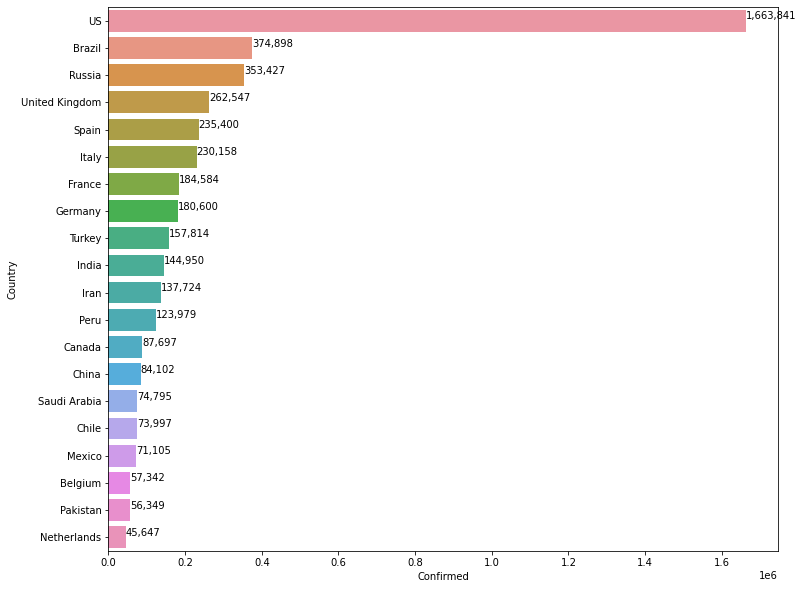

In [16]:
### List the Top 20 nations ranked in descending order of confirmed Covid 19 cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

### Barplot

plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



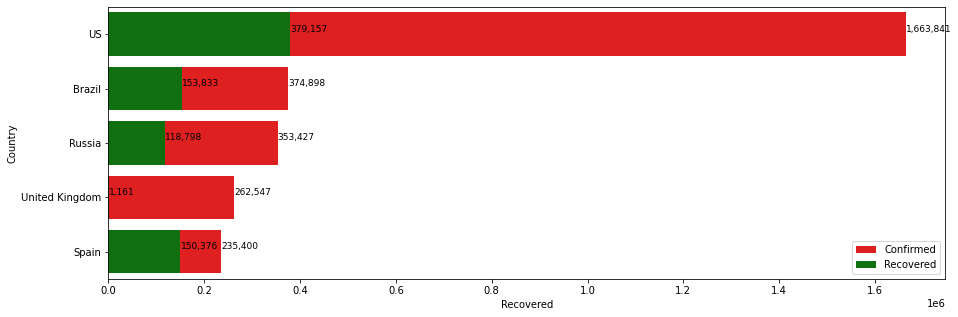

In [8]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

### Generate Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country'], color = 'green', label='Recovered')

### Barplot Text
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

In [12]:
figure = px.choropleth(world,locations='Country', 
locationmode='country names', color='Confirmed', 
hover_name='Country', color_continuous_scale='tealgrn', 
range_color=[1,1000000],title='Confirmed Covid 19 Cases')

figure.show()

Map can be zoomed in and out on (when loaded in Google Colab)